In [1]:


import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기계학습 8주차/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [2]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [3]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=False)

rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0512 - mae: 0.1702 - mse: 0.0512
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mae: 0.0864 - mse: 0.0105
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mae: 0.0443 - mse: 0.0031
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - mae: 0.0301 - mse: 0.0015
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0281 - mse: 0.0013
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0258 - mse: 0.0011
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0270 - mse: 0.0013
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0265 - mse: 0.0011
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0274 - mse: 0.0012
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mae: 0.0309 - mse: 0.0015
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - 

In [68]:
# 4. LSTM 모델
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0733 - mae: 0.2052 - mse: 0.0733
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - mae: 0.0727 - mse: 0.0089
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mae: 0.0523 - mse: 0.0050
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 - mae: 0.0509 - mse: 0.0046
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mae: 0.0538 - mse: 0.0056
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mae: 0.0521 - mse: 0.0051
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mae: 0.0500 - mse: 0.0047
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mae: 0.0558 - mse: 0.0062
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mae: 0.0563 - mse: 0.0055
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mae: 0.0533 - mse: 0.0052
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


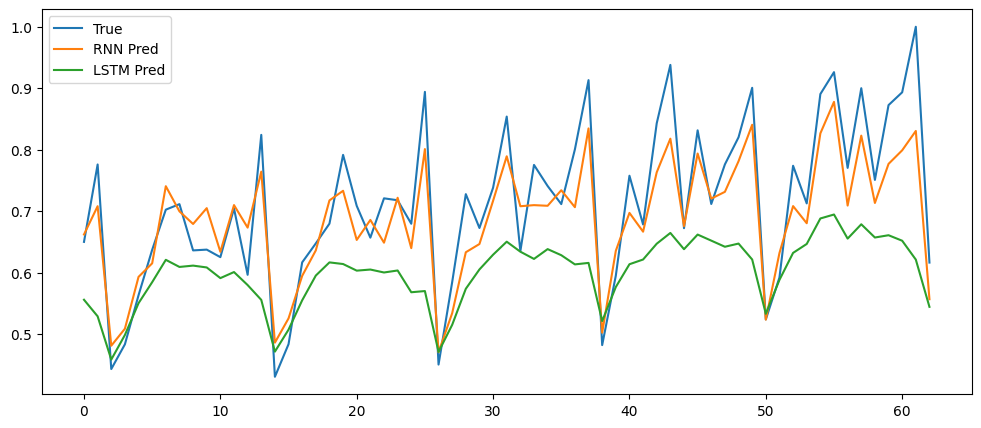

In [72]:
import matplotlib.pyplot as plt
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)


plt.figure(figsize=(12,5))
plt.plot(y_test, label='True')
plt.plot(rnn_pred, label='RNN Pred')
plt.plot(lstm_pred, label='LSTM Pred')
plt.legend()
plt.show()


In [73]:
rnn_model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030 - mae: 0.0458 - mse: 0.0030


[0.0033169458620250225, 0.0033169458620250225, 0.04827560856938362]

In [74]:
lstm_model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0194 - mae: 0.1088 - mse: 0.0194


[0.021765081211924553, 0.021765081211924553, 0.11683490872383118]